<a href="https://colab.research.google.com/github/rutikkore/first-repo/blob/main/Canteen_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

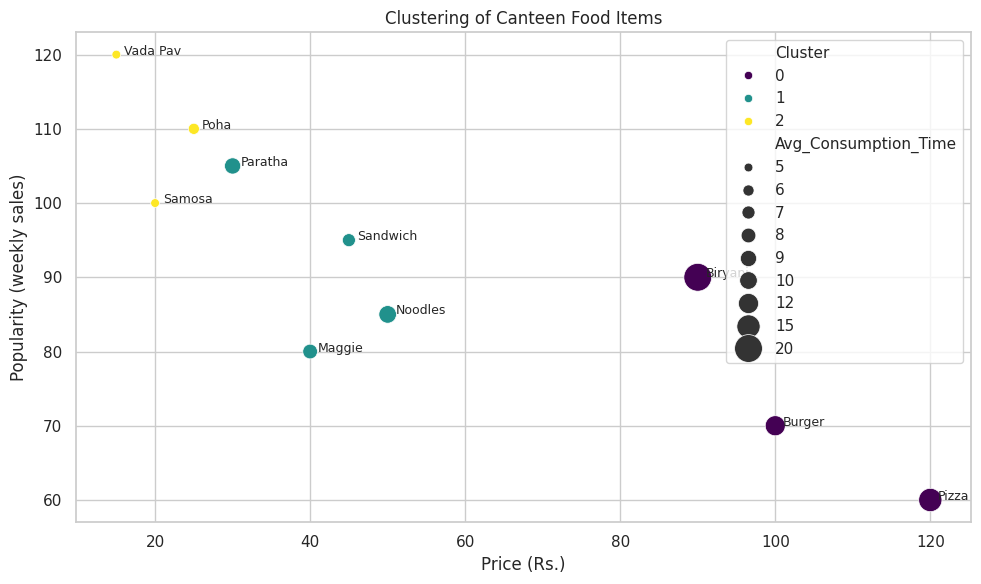

Clustering complete. Outputs saved as CSV and PNG.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Simulated data
np.random.seed(42)
data = {
    'Food_Item': [
        'Vada Pav', 'Samosa', 'Maggie', 'Pizza', 'Burger',
        'Biryani', 'Poha', 'Sandwich', 'Noodles', 'Paratha'
    ],
    'Popularity': [120, 100, 80, 60, 70, 90, 110, 95, 85, 105],
    'Price': [15, 20, 40, 120, 100, 90, 25, 45, 50, 30],
    'Avg_Consumption_Time': [5, 5, 8, 15, 12, 20, 6, 7, 10, 9]
}

df = pd.DataFrame(data)

# Normalize data
features = ['Popularity', 'Price', 'Avg_Consumption_Time']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Save to CSV
df.to_csv("canteen_clustered_menu.csv", index=False)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Price', y='Popularity',
    hue='Cluster',
    size='Avg_Consumption_Time',
    sizes=(40, 400),
    data=df,
    palette='viridis',
    legend='full'
)
for i in range(len(df)):
    plt.text(df['Price'][i]+1, df['Popularity'][i], df['Food_Item'][i], fontsize=9)
plt.title("Clustering of Canteen Food Items")
plt.xlabel("Price (Rs.)")
plt.ylabel("Popularity (weekly sales)")
plt.tight_layout()
plt.savefig("canteen_clusters_plot.png")
plt.show()

print("Clustering complete. Outputs saved as CSV and PNG.")
